# Projeto de Estatística II


## Parte I - Regressão Linear

-------------------------------

**Instruções:**

- A primeira parte do projeto engloba a avliação dos tópicos de regressão linear.
- Ela deve ser entregue até o dia 26/04/2022.
- Para a entrega, salve seu notebook na pasta Projetos do nosso drive com o nome do notebook com o seguinte padrão: [primeiro nome]_[sobrenome]_projeto_estatistica_II_parteI.ipynb
- A avaliação será registrada nos notebooks em formato de comentários.
-------------------------------

O dataset 'cancer_EUA.csv' relaciona a taxa de mortalidade por câncer em alguns condados dos EUA e outras features destes condados.

Dicionário dos dados:

* TARGET_deathRate: Dependent variable. Mean per capita (100,000) cancer mortalities

* avgAnnCount: Mean number of reported cases of cancer diagnosed annually

* avgDeathsPerYear: Mean number of reported mortalities due to cancer

* incidenceRate: Mean per capita (100,000) cancer diagoses

* medianIncome: Median income per county

* popEst2015: Population of county

* povertyPercent: Percent of populace in poverty

* studyPerCap: Per capita number of cancer-related clinical trials per county

* binnedInc: Median income per capita binned by decile

* MedianAge: Median age of county residents

* MedianAgeMale: Median age of male county residents

* MedianAgeFemale: Median age of female county residents

* Geography: County name

* AvgHouseholdSize: Mean household size of county

* PercentMarried: Percent of county residents who are married

* PctNoHS18_24: Percent of county residents ages 18-24 highest education attained: less than high school

* PctHS18_24: Percent of county residents ages 18-24 highest education attained: high school diploma

* PctSomeCol18_24: Percent of county residents ages 18-24 highest education attained: some college

* PctBachDeg18_24: Percent of county residents ages 18-24 highest education attained: bachelor's degree

* PctHS25_Over: Percent of county residents ages 25 and over highest education attained: high school diploma

* PctBachDeg25_Over: Percent of county residents ages 25 and over highest education attained: bachelor's degree

* PctEmployed16_Over: Percent of county residents ages 16 and over employed

* PctUnemployed16_Over: Percent of county residents ages 16 and over unemployed

* PctPrivateCoverage: Percent of county residents with private health coverage

* PctPrivateCoverageAlone: Percent of county residents with private health coverage alone (no public assistance)

* PctEmpPrivCoverage: Percent of county residents with employee-provided private health coverage

* PctPublicCoverage: Percent of county residents with government-provided health coverage

* PctPubliceCoverageAlone: Percent of county residents with government-provided health coverage alone

* PctWhite: Percent of county residents who identify as White

* PctBlack: Percent of county residents who identify as Black

* PctAsian: Percent of county residents who identify as Asian

* PctOtherRace: Percent of county residents who identify in a category which is not White, Black, or Asian

* PctMarriedHouseholds: Percent of married households

* BirthRate: Number of live births relative to number of women in county

O objetivo da primeira parte do projeto é criar um modelo linear para prever o target (TARGET_deathRate). Para isso, siga o passo a passo abaixo e apresente seus raciocínios e resultados. 

1. Antes de qualquer exploração dos dados, leia o dicionário dos dados e reflita sobre a feature que você acredita ser mais correlacionada com o target. (Sem medo de errar. Não existe certo ou errado nesta questão.) 

R: Visto que o target é composto por uma variável que mostra a média per capta de mortalidade por câncer, penso que a feature mais correlacionada pode ser "avgDeathsPerYear" ou "incidenceRate".

2. Agora, realize um EDA na base de dados para entender mais sobre as features. Quais são suas conclusões?

R: Cada linha traz informações sumarizadas de um condado (sem repetição) dos EUA.

Foi necessário realizar conversões no dataframe pois as features encontravam-se no formato object.

Algumas features possuíam valores nulos.

As variáveis mais correlacionadas ao target são "avgDeathsPerYear" e "PctPublicCoverageAlone" respectivamente.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('cancer_EUA.csv', sep=';')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   avgAnnCount              3047 non-null   object
 1   avgDeathsPerYear         3047 non-null   object
 2   TARGET_deathRate         3047 non-null   object
 3   incidenceRate            3047 non-null   object
 4   medIncome                3047 non-null   object
 5   popEst2015               3047 non-null   object
 6   povertyPercent           3047 non-null   object
 7   studyPerCap              3047 non-null   object
 8   binnedInc                3047 non-null   object
 9   MedianAge                3047 non-null   object
 10  MedianAgeMale            3047 non-null   object
 11  MedianAgeFemale          3047 non-null   object
 12  Geography                3047 non-null   object
 13  AvgHouseholdSize         3047 non-null   object
 14  PercentMarried           3047 non-null  

Comentários:

A questão das variáveis virem com o tipo object poderia ser solucionada com a inclusão de um parâmetro decimal=',' na função pd.read_csv. O dataset foi criado com a vírgula separando as casas decimais dos inteiros, mas o default do pandas é a utilização do ponto, por isso o pandas entendeu tudo como string.

In [ ]:
# Filtrando e tratando as colunas que podem ser convertidas
# (as colunas binnedInc e Geography serão mantidas em seu formato original)

numeric_columns = ['avgAnnCount', 'avgDeathsPerYear', 'TARGET_deathRate', 'incidenceRate',
       'medIncome', 'popEst2015', 'povertyPercent', 'studyPerCap', 'MedianAge',
       'MedianAgeMale', 'MedianAgeFemale', 'AvgHouseholdSize',
       'PercentMarried', 'PctNoHS18_24', 'PctHS18_24', 'PctSomeCol18_24',
       'PctBachDeg18_24', 'PctHS25_Over', 'PctBachDeg25_Over',
       'PctEmployed16_Over', 'PctUnemployed16_Over', 'PctPrivateCoverage',
       'PctPrivateCoverageAlone', 'PctEmpPrivCoverage', 'PctPublicCoverage',
       'PctPublicCoverageAlone', 'PctWhite', 'PctBlack', 'PctAsian',
       'PctOtherRace', 'PctMarriedHouseholds', 'BirthRate']

for i in numeric_columns:
    df[i] = df[i].str.replace(',','.')
    df[i] = df[i].astype(float)

In [ ]:
# Verificando a porcentagem de valores nulos em cada feature
(df.isnull().sum() / df.shape[0]) * 100

avgAnnCount                 0.000000
avgDeathsPerYear            0.000000
TARGET_deathRate            0.000000
incidenceRate               0.000000
medIncome                   0.000000
popEst2015                  0.000000
povertyPercent              0.000000
studyPerCap                 0.000000
binnedInc                   0.000000
MedianAge                   0.000000
MedianAgeMale               0.000000
MedianAgeFemale             0.000000
Geography                   0.000000
AvgHouseholdSize            0.000000
PercentMarried              0.000000
PctNoHS18_24                0.000000
PctHS18_24                  0.000000
PctSomeCol18_24            74.991795
PctBachDeg18_24             0.000000
PctHS25_Over                0.000000
PctBachDeg25_Over           0.000000
PctEmployed16_Over          4.988513
PctUnemployed16_Over        0.000000
PctPrivateCoverage          0.000000
PctPrivateCoverageAlone    19.986872
PctEmpPrivCoverage          0.000000
PctPublicCoverage           0.000000
P

In [ ]:
# Buscando quais são as variáveis mais correlacionadas com o target
correlation = df.corr(method='spearman')
correlation['TARGET_deathRate'].sort_values(ascending=False).head()

TARGET_deathRate          1.000000
avgDeathsPerYear          0.672511
PctPublicCoverageAlone    0.453102
povertyPercent            0.442435
PctHS25_Over              0.420579
Name: TARGET_deathRate, dtype: float64

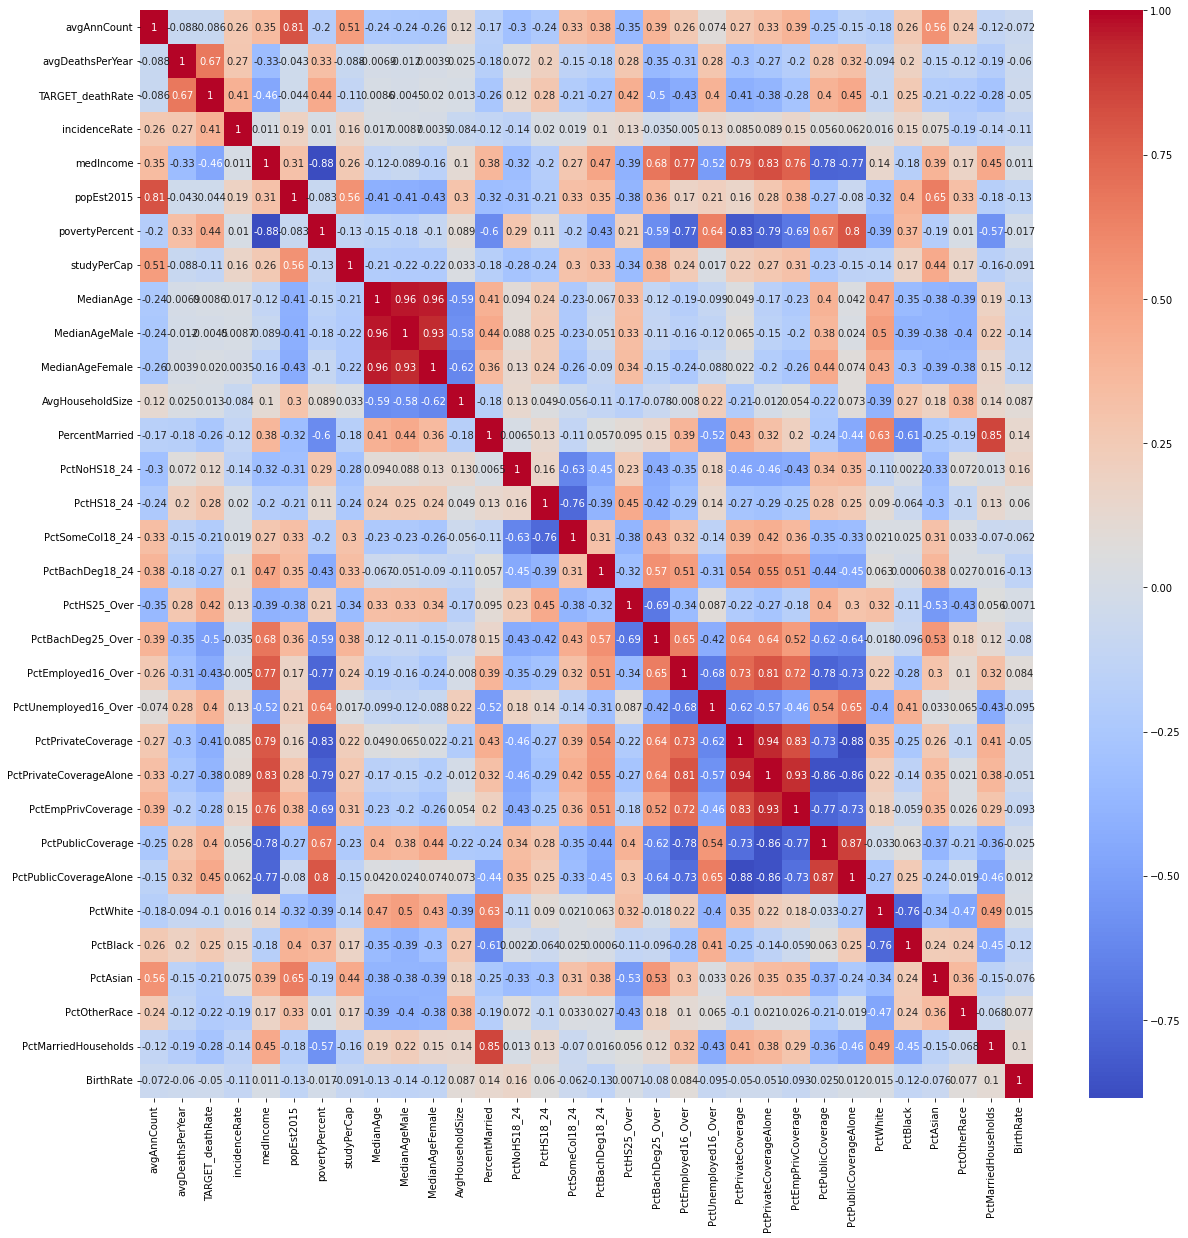

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(correlation, cmap='coolwarm', annot=True);

3. Como o target está distribuído? Quais são as seus valores de média, mediana e variância? A distribuição é assimétrica?

R: O target segue uma distribuição normal e assimétrica.

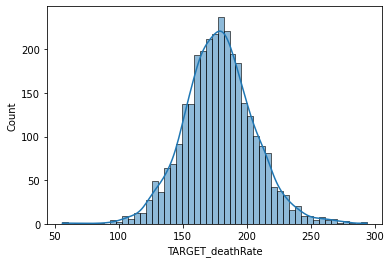

In [ ]:
sns.histplot(data=df, x="TARGET_deathRate", kde=True);

In [ ]:
df["TARGET_deathRate"].skew() # Distribuição assimétrica positiva

0.12931340277335948

In [ ]:
import statistics as st
print('Média:', st.mean(df["TARGET_deathRate"]))
print('Mediana:', st.median(df["TARGET_deathRate"]))
print('Desvio padrão:', st.stdev(df["TARGET_deathRate"]))
print('Moda:', st.mode(df["TARGET_deathRate"]))

Média: 178.49100754840828
Mediana: 178.1
Desvio padrão: 27.629796675852056
Moda: 184.3


3. Pensando em um modelo de Regressão Linear Simples escolha uma feature para ser a variável independente, mas procure escolher uma que faça sentido com o modelo linear. 

    3.1. Como é a distribuição da feature escolhida? Ela possui outliers? Precisa de alguma limpeza nos dados?

R: A feature "avgDeathsPerYear" segue uma distribuição normal e assimétrica, sem valores missing. Ela possui apenas 2 outliers que deverão ser removidos.

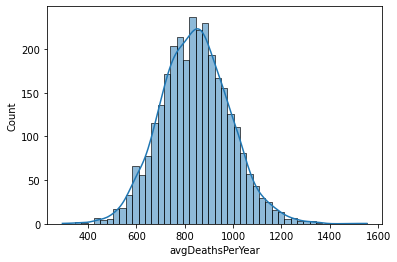

In [ ]:
sns.histplot(data=df, x="avgDeathsPerYear", kde=True);

In [ ]:
df["avgDeathsPerYear"].skew() # Distribuição assimétrica positiva

0.15836375418940318

In [ ]:
df["avgDeathsPerYear"].isna().sum() # Sem valores missing

0

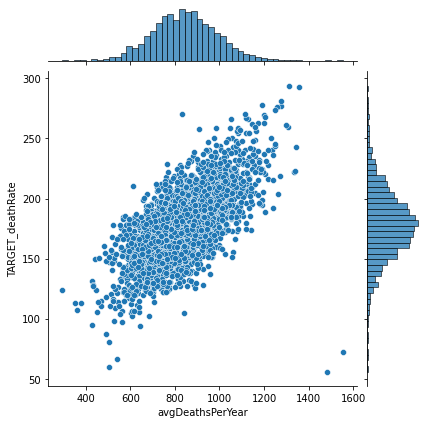

In [ ]:
# Identificando os outliers
sns.jointplot(data=df,x='avgDeathsPerYear', y='TARGET_deathRate');

In [ ]:
# Removendo os outliers
df = df[(df['avgDeathsPerYear']<1400)]

    3.2. Treine um modelo de Regressão Linear Simples com o objetivo de predizer a variável dependente 'TARGET_deathRate'. Apresente o modelo treinado e avalie a normalidade dos resíduos. Não esqueça de dividir o dataset em treino e teste para uma posterior avaliação do modelo.

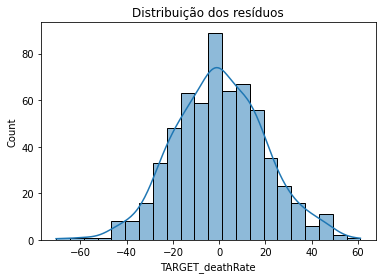

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = df['avgDeathsPerYear']
y = df['TARGET_deathRate']

# Instanciando a classe do estimador
estimator = LinearRegression()

# Separando os dados em dados de treino e dados de teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinando o modelo
model = estimator.fit(X_train.values.reshape(-1,1),y_train)

# Fazendo previsões usando os dados de teste 
y_pred = estimator.predict(X_test.values.reshape(-1,1))

#Encontrando o resíduo
residuo = y_test - y_pred

# Analisando a distribuição do resíduo
plt.title("Distribuição dos resíduos")
sns.histplot(residuo, kde=True);

In [ ]:
residuo.skew() # Distribuição assimétrica positiva

0.01707862419235355

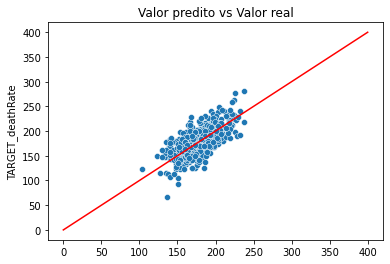

In [ ]:
plt.title("Valor predito vs Valor real")
sns.scatterplot(x=y_pred, y=y_test)
plt.plot(np.linspace(0, 400, 4000), np.linspace(0, 400, 4000), color="red")
plt.show()

    3.3 Utilizando as métricas de avaliação verifique o resultado do modelo para o conjunto de dados de teste.

In [ ]:
# Avaliando o resultado do modelo
from sklearn.metrics import r2_score
from sklearn import metrics

model_1_metrics = [metrics.r2_score(y_test, y_pred),
                   metrics.mean_absolute_error(y_test, y_pred),
                   metrics.mean_squared_error(y_test, y_pred),
                   metrics.mean_squared_error(y_test, y_pred,squared=False)
                  ]

print('\nR^2:', model_1_metrics[0])
print('MAE:', model_1_metrics[1])
print('MSE:', model_1_metrics[2])
print('RMSE:', model_1_metrics[3])


R^2: 0.46799819149288
MAE: 15.434911353896473
MSE: 381.0586034891743
RMSE: 19.520722412072107


4. Agora, treine um modelo de Regressão Linear múltipla sem utilizar o min-max scaler e outro com o min-max scaler. Qual obteve o melhor resultado no teste? Quais são as features mais importantes?

R: Os resultados foram praticamente idênticos utilizando o min-max scaler e sem utilizar o min-max scaler.

In [ ]:
# Dropando as colunas com valores missing e do tipo object
df = df.dropna(axis='columns', how='any')
df = df.drop(['binnedInc','Geography'], axis='columns')

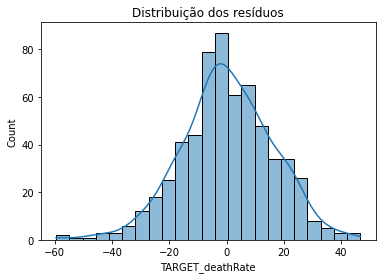

In [ ]:
X = df.drop(columns=['TARGET_deathRate'])
y = df['TARGET_deathRate']

# Instanciando a classe do estimador
estimator = LinearRegression()

# Separando os dados em dados de treino e dados de teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinando o modelo
model_2 = estimator.fit(X_train,y_train)

# Fazendo previsões usando os dados de teste 
y_pred = estimator.predict(X_test)

# Encontrando o resíduo
residuo = y_test - y_pred

# Analisando a distribuição do resíduo
plt.title("Distribuição dos resíduos")
sns.histplot(residuo, kde=True);

In [ ]:
residuo.skew() # Distribuição assimétrica negativa

-0.19241357225255637

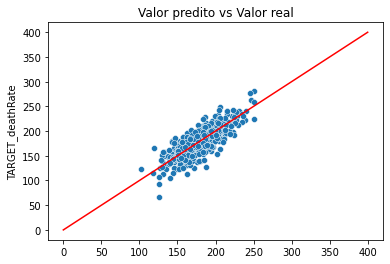

In [ ]:
plt.title("Valor predito vs Valor real")
sns.scatterplot(x=y_pred, y=y_test)
plt.plot(np.linspace(0, 400, 4000), np.linspace(0, 400, 4000), color="red")
plt.show()

In [ ]:
# Avaliando o resultado do modelo sem utilizar min-max scaler
model_2_metrics = [metrics.r2_score(y_test, y_pred),
                   metrics.mean_absolute_error(y_test, y_pred),
                   metrics.mean_squared_error(y_test, y_pred),
                   metrics.mean_squared_error(y_test, y_pred,squared=False)
                  ]

print('\nR^2:', model_2_metrics[0])
print('MAE:', model_2_metrics[1])
print('MSE:', model_2_metrics[2])
print('RMSE:', model_2_metrics[3])


R^2: 0.6400611996862202
MAE: 12.52749467665987
MSE: 257.81449310111145
RMSE: 16.056602788295894


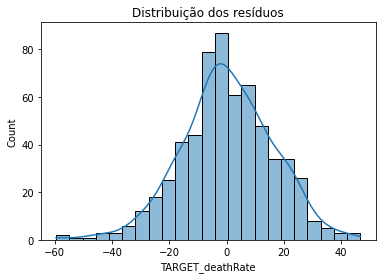

In [ ]:
X = df.drop(columns=['TARGET_deathRate'])
y = df['TARGET_deathRate']

# Instanciando a classe do estimador
estimator = LinearRegression()

# Separando os dados em dados de treino e dados de teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Aplicando MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
mms.fit(X_train)

# Transformando os dados
X_train = mms.transform(X_train)
X_test = mms.transform(X_test)

# Treinando o modelo
model_3 = estimator.fit(X_train,y_train)

# Fazendo previsões usando os dados de teste 
y_pred = estimator.predict(X_test)

#Encontrando o resíduo
residuo = y_test - y_pred

# Analisando a distribuição do resíduo
plt.title("Distribuição dos resíduos")
sns.histplot(residuo, kde=True);

In [ ]:
residuo.skew() # Distribuição assimétrica negativa

-0.192413572252921

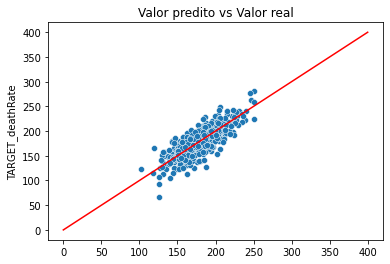

In [ ]:
plt.title("Valor predito vs Valor real")
sns.scatterplot(x=y_pred, y=y_test)
plt.plot(np.linspace(0, 400, 4000), np.linspace(0, 400, 4000), color="red")
plt.show()

In [ ]:
# Avaliando o resultado do modelo utilizando min-max scaler
model_3_metrics = [metrics.r2_score(y_test, y_pred),
                   metrics.mean_absolute_error(y_test, y_pred),
                   metrics.mean_squared_error(y_test, y_pred),
                   metrics.mean_squared_error(y_test, y_pred,squared=False)
                  ]

print('\nR^2:', model_3_metrics[0])
print('MAE:', model_3_metrics[1])
print('MSE:', model_3_metrics[2])
print('RMSE:', model_3_metrics[3])


R^2: 0.6400611996861552
MAE: 12.52749467666093
MSE: 257.81449310115806
RMSE: 16.056602788297344


In [ ]:
# Avaliando os coeficientes e determinando as features mais importantes para o modelo
coeff_df = pd.DataFrame(estimator.coef_, X.columns, columns=['Parameter value'])

coeff_df.abs().sort_values(by='Parameter value',ascending=False).head()

,Parameter value
incidenceRate,106.580629
avgDeathsPerYear,89.526662
PctMarriedHouseholds,35.880178
PctPrivateCoverage,34.491305
PctBachDeg25_Over,31.750673


5. Compare os três modelos desenvolvidos.

R: O modelo de regressão linear múltipla sem utilização do Min Max Scaler foi ligeiramente melhor que o modelo que utilizou o Min Max Scaler.
Já o modelo de regressão linear simples foi aproximadamente 28% pior que o modelo múltiplo.

In [ ]:
print("Regressão linear simples")
print('\nR^2:', model_1_metrics[0])
print('MAE:', model_1_metrics[1])
print('MSE:', model_1_metrics[2])
print('RMSE:', model_1_metrics[3])
print("\n")

print("Regressão linear múltipla sem MMS")
print('\nR^2:', model_2_metrics[0])
print('MAE:', model_2_metrics[1])
print('MSE:', model_2_metrics[2])
print('RMSE:', model_2_metrics[3])
print("\n")

print("Regressão linear múltipla com MMS")
print('\nR^2:', model_3_metrics[0])
print('MAE:', model_3_metrics[1])
print('MSE:', model_3_metrics[2])
print('RMSE:', model_3_metrics[3])

Regressão linear simples

R^2: 0.46799819149288
MAE: 15.434911353896473
MSE: 381.0586034891743
RMSE: 19.520722412072107


Regressão linear múltipla sem MMS

R^2: 0.6400611996862202
MAE: 12.52749467665987
MSE: 257.81449310111145
RMSE: 16.056602788295894


Regressão linear múltipla com MMS

R^2: 0.6400611996861552
MAE: 12.52749467666093
MSE: 257.81449310115806
RMSE: 16.056602788297344


Comentários:

* Correta utilização dos modelos e técnicas aprendidos em sala.
* Boa análise dos resultados dos modelos.
* Tomar cuidado com a leitura dos dados com o pandas.